# SVM classifier 

- Breast Cancer Dataset (In-built)

### Step 1: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

### Step 2: Load and prepare the dataset


In [4]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

### Step 3: Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Feature scaling

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5: Train an SVM classifier

In [10]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### Step 6: Make predictions

In [12]:
y_pred = svm_classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

### Step 7: Evaluate the model

In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.956140350877193

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[39,  4],
       [ 1, 70]], dtype=int64)

In [20]:
classification_rep = classification_report(y_test, y_pred)
classification_rep 

'              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94        43\n           1       0.95      0.99      0.97        71\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

### Step 8: Visualize results using PCA

In [23]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [30]:

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

MemoryError: Unable to allocate 106. GiB for an array with shape (60983, 234242) and data type float64

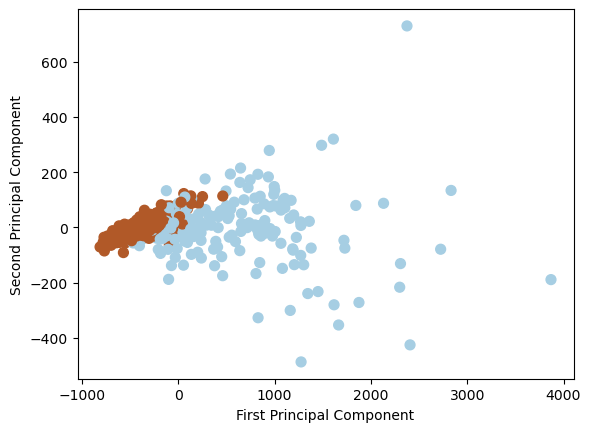

In [34]:
# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

### Step 9: Print results

In [36]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

